In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# minus 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

In [9]:
df = pd.read_csv('./data1/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949',
                 low_memory=False)

In [10]:
df.head(3)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42699 entries, 0 to 42698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               42699 non-null  int64 
 1   시장/마트 번호           42699 non-null  int64 
 2   시장/마트 이름           42699 non-null  object
 3   품목 번호              42699 non-null  int64 
 4   품목 이름              42699 non-null  object
 5   실판매규격              42699 non-null  object
 6   가격(원)              42699 non-null  int64 
 7   년도-월               42699 non-null  object
 8   비고                 42425 non-null  object
 9   시장유형 구분(시장/마트) 코드  42699 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  42699 non-null  object
 11  자치구 코드             42699 non-null  int64 
 12  자치구 이름             42699 non-null  object
 13  점검일자               42699 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.6+ MB


AttributeError: 'NoneType' object has no attribute 'sum'

# 데이터 확인

In [26]:
df['시장/마트 이름'].nunique()

102

In [27]:
df['시장/마트 이름'].unique()

array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
       'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
       '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
       '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
       '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
       '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
       '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
       '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
       '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
       '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
       '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
       '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
       '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
       '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
       '둔촌역전통시장', '홈플러스 월드컵점', '도곡시장', '신원시장(신림1동)',

In [32]:
# 시장/마트 목록
df_market = df[['시장/마트 번호', '시장/마트 이름', '자치구 이름',
    '시장유형 구분(시장/마트) 코드']].drop_duplicates()

In [33]:
# 자치구별 시장/마트 갯수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [34]:
df_market[df_market['자치구 이름'] == '중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 코드
0,2,신세계백화점,중구,2
21,56,롯데백화점,중구,2
257,60,이마트 청계점,중구,2
576,11,남대문시장,중구,1
3799,8,롯데마트 서울역점,중구,2
4920,199,서울중앙시장,중구,1


In [36]:
# 품목 목록
df_items = df[['품목 번호', '품목 이름']].drop_duplicates()
df_items[:30]

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
5,22,오이
6,312,애호박
7,24,양파
8,58,"쇠고기(한우,불고기)"
9,307,배추(2.5~3kg)


In [38]:
df_items[30:60]

,품목 번호,품목 이름
54,264,"명태(냉동,수입산)"
56,276,배(신고)
58,28,사과
79,25,무
97,278,쇠고기
103,308,무(1kg)
114,259,"조기(냉동,국산)"
135,304,고등어
157,27,배
177,260,"조기(냉동,수입산)"


In [39]:
df_items[60:]

,품목 번호,품목 이름
1550,318,"고등어(30cm,수입산)"
1820,284,배(중품)
1898,118,"호박(인큐베이터),중간"
2191,272,양파(작은망)
2432,274,"무(세척무, 중)"
2457,265,"명태(생물,수입산)"
2466,175,배추(중간)
2567,255,"오징어(생물,수입산)"
2620,54,오징어(냉동)
3706,313,"냉동참조기(20cm,수입)"


In [41]:
# 자치구 목록
df_gu = df[['자치구 코드', '자치구 이름']].drop_duplicates()
df_gu.shape

(25, 2)

In [42]:
# 시장유형
df[['시장유형 구분(시장/마트) 코드', '시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


# 삼겹살 가격 분석

In [43]:
df.head(4)

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24


In [44]:
# 특정 문자열이 포함되어 있는지 확인 .str.contains(문자열)
df_sam = df[(df['품목 이름'].str.contains('삼겹살')) &
   (df['년도-월']=='2021-06') & (df['실판매규격'].str.contains('600g'))]

In [45]:
df_sam

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,1668261,100,홈플러스 중계점,99,돼지고기(생삼겹살),600g,22140,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
6514,1674124,40,홈플러스 등촌점,99,돼지고기(생삼겹살),600g,14940,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
6700,1671992,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,도드람,2,대형마트,290000,성북구,2021-06-24
6721,1670048,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24


In [46]:
df_sam.shape

(224, 14)

In [47]:
# 삼겹살 가격의 평균


In [49]:
df_sam['가격(원)'].mean()

16842.723214285714

In [50]:
# 최댓값
df_sam['가격(원)'].max()

35890

In [51]:
# 최저가
df_sam['가격(원)'].min()

1690

In [52]:
# 조건 : 5000원 이하인 시장/마트이름
df_sam[df_sam['가격(원)'] < 5000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
3645,1667404,27,이마트 창동점,99,돼지고기(생삼겹살),600g,2720,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24
4052,1667438,28,홈플러스 방학점,99,돼지고기(생삼겹살),600g,1690,2021-06,국내산,2,대형마트,320000,도봉구,2021-06-24


# 우리동네 삼겹살 가격

In [58]:
gu = input('구이름 : ')
df_sam_gu = df_sam[df_sam['자치구 이름'] == '마포구'][['시장/마트 이름',
                                            '품목 이름', '실판매규격', '가격(원)']].drop_duplicates()
df_sam_gu

구이름 : 마포구


,시장/마트 이름,품목 이름,실판매규격,가격(원)
1904,망원시장,돼지고기(생삼겹살),600g,13600
2196,마포농수산물시장,돼지고기(생삼겹살),600g,17700
2267,마포농수산물시장,돼지고기(생삼겹살),600g,17600
2389,홈플러스 월드컵점,돼지고기(생삼겹살),600g,15540
6222,농협하나로마트 신촌점,돼지고기(생삼겹살),600g,14600
6231,농협하나로마트 신촌점,돼지고기(생삼겹살),600g,14340


<function matplotlib.pyplot.show(close=None, block=None)>

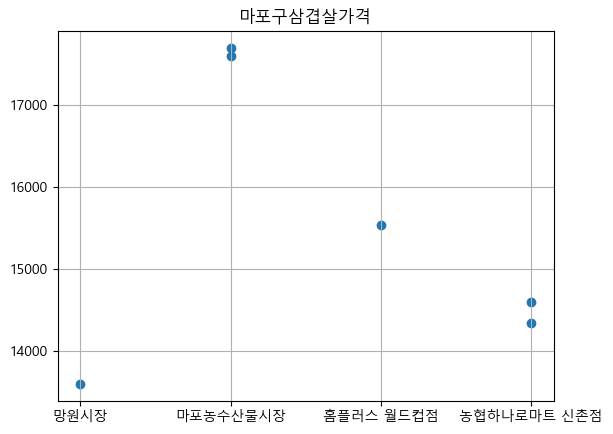

In [59]:
# 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']
plt.scatter(x, y)
plt.title(gu + '삼겹살가격')
plt.grid()
plt.show

# 마트 지점별 삼겹살 가격

In [72]:
mart = input('시장/마트 이름 : ') # 입력 백화점

시장/마트 이름 : 롯데마트


In [73]:
# 마트 지점별 삼겹살 가격 시장/마트 이름 -> 품목이름 -> 실판매규격 -> 가격(원)
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)[['시장/마트 이름',
                                            '품목 이름', '가격(원)']].drop_duplicates()
df_sam_mart

SyntaxError: invalid syntax (3520979065.py, line 4)

In [71]:
# 시각화
x = df_sam_mart['시장/마트 이름']
y = df_sam_mart['가격(원)']
plt.scatter(x, y)
plt.title(gu + '삼겹살가격')
plt.grid()
plt.show

NameError: name 'df_sam_mart' is not defined

# 달걀 분석

In [74]:
# 21-6월 데이터 규격 : 30개 데이터 프레임 만들기
# 30개 평균가격, 최대, 최소, 6000원 이하가 어디인지
# 여러분들 동네 달걀가격,

In [109]:
df_egg = df[(df['품목 이름'].str.contains('달걀')) &
   (df['년도-월']=='2021-06') & (df['실판매규격'].str.contains('30개'))]

In [114]:
df_egg['가격(원)'].mean()

9084.895899053628

In [115]:
df_egg['가격(원)'].max()

75000

In [116]:
df_egg['가격(원)'].min()

0

In [118]:
df_egg[df_egg['가격(원)'] < 6000]

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
1139,1671027,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
1477,1669024,75,이마트 성수점,320,달걀(30개),30개,5520,2021-06,국내산신선한란,2,대형마트,200000,성동구,2021-06-24
3953,1671893,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
3982,1669551,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4049,1668111,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
4057,1674534,147,롯데백화점 잠실점,320,달걀(30개),30개,0,2021-06,NaN,2,대형마트,710000,송파구,2021-06-24
5002,1669143,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5051,1673719,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24
5092,1667271,88,롯데백화점 청량리점,320,달걀(30개),30개,0,2021-06,없음,2,대형마트,230000,동대문구,2021-06-24


In [129]:
df_egg_mapo = df[(df['품목 이름'].str.contains('달걀')) & (df['년도-월']=='2021-06') &
                 (df['실판매규격'].str.contains('30개') &(df['자치구 이름']=='마포구'))]

In [130]:
df_egg_mapo['가격(원)'].mean()

8581.875